In [23]:
import imageio.v3 as iio
import io
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# load an example image
img = iio.imread('imageio:astronaut.png')
img = np.dot(img, [0.2989, 0.5870, 0.1140])
print(np.max(img), np.min(img))
img = img.astype(np.uint8)

254.97449999999998 0.0


In [31]:
print(img.shape)

(512, 512)


In [32]:
iio.imwrite("raw.png", img, format="png")

In [33]:
iio.imwrite("compressed.jpg", img, plugin="pillow", extension=".jpg", quality=1)

In [34]:
iio.imwrite("compressed_2000.j2k", img, plugin="pillow", extension=".j2k", quality_mode="rates", quality_layers=[100], irreversible=True)

In [43]:
output = io.BytesIO()
iio.imwrite(output, img, plugin="pillow", extension=".j2k", quality_mode="rates", quality_layers=[100], irreversible=True)

with open("compressed_2000.rb", "wb") as f:
    f.write(output.getvalue())

In [41]:
with open("compressed_2000.rb", "rb") as f:
    data = io.BytesIO(f.read())

data = iio.imread(data, extension=".j2k", plugin="pillow")
print(data.shape)

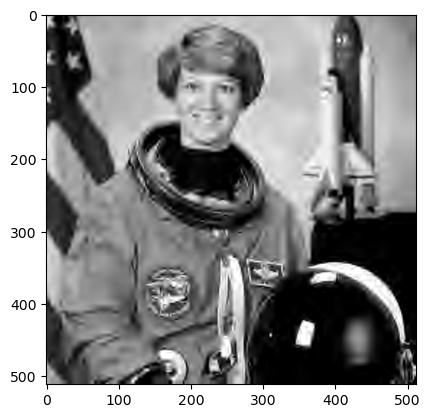

In [39]:
plt.figure()
plt.imshow(data, cmap="gray")
plt.show()